### Erick Javier Matos Ramos IRD 5°A

# REGRESION LOGISTICA

Tome el ejemplo de #https://datatofish.com/logistic-regression-python/
solo que le cambie la base de datos ya que en el ejemplo muestra una de 40 datos para metodos de entendimiento
y use la de avocado.csv que fue tomada de kaggle


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

#df = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/logisitca.csv') #base de datos del ejemplo
df1 = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/avocado.csv')
df=df1.sample(400) #como son muchos datos, aqui defini solo usar 400 como muestra para este ejemplo (en la pagina solo eran 40)
df


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1053,13,2015-09-27,1.27,92325.73,52301.92,14641.98,1047.02,24334.81,14588.26,9746.55,0.00,conventional,2015,Jacksonville
11299,41,2015-03-15,1.49,8349.37,7690.44,315.77,0.00,343.16,343.16,0.00,0.00,organic,2015,SanDiego
8588,2,2018-03-11,1.01,275804.74,65139.45,22713.79,10175.31,177776.19,146773.92,30140.64,861.63,conventional,2018,CincinnatiDayton
115,11,2015-10-11,1.24,653560.14,34707.02,392008.60,58490.10,168354.42,163669.01,4685.41,0.00,conventional,2015,BaltimoreWashington
5984,50,2017-01-15,0.93,6656554.36,2075029.62,2450277.12,95137.62,2036110.00,1910596.03,99912.91,25601.06,conventional,2017,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14321,48,2016-01-24,1.35,70767.77,23737.39,5747.06,0.00,41283.32,39836.86,1446.46,0.00,organic,2016,SouthCentral
4839,3,2016-12-04,1.17,105733.40,43234.65,26047.67,160.98,36290.10,35680.66,486.67,122.77,conventional,2016,Roanoke
6674,51,2017-01-08,0.86,222849.42,17783.95,112339.02,3127.01,89599.44,41838.55,47759.42,1.47,conventional,2017,Indianapolis
1665,1,2015-12-20,1.33,306843.13,9646.13,198361.80,532.68,98302.52,88587.50,9715.02,0.00,conventional,2015,Philadelphia


In [99]:
#Datos del ejemplo
#x = df[['gmat', 'gpa','work_experience']] #Estos son los datos del csv, los cuales serviran para entrenar al modelo
#y = df['admited']    

#datos con la base de datos avocado.csv
x = df[['Total Volume','AveragePrice','Total Bags']]#Estos son los datos del csv, los cuales serviran para entrenar al modelo
y = df['type']

In [100]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

#utilizamos las funciones para entrenar al modelo
#proporcionandole los datos de X,Y, un tamaño de prueba de .25% por lo tanto solo hagarrara el 25% de los datos para pruebas
#y los demas los usara como datos de entrenamiento (75%)

In [101]:
logistic_regression= LogisticRegression()#Usaremos el metodo de regresion logistica de sklearn
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\ERICK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


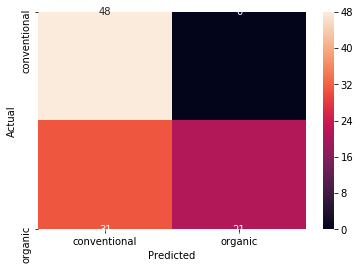

In [102]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [103]:
print('Accuracy (Precisión): ',metrics.accuracy_score(y_test, y_pred))
plt.show()
#Imprimimos la precicision que es
# (verdaderos positivos + Verdaderos negativos) / Total

Accuracy (Precisión):  0.69


In [104]:
print (X_test) #valores de prueba 
print (y_pred) #predicted values

       Total Volume  AveragePrice  Total Bags
11925       8720.44          1.71     3022.46
16031       3393.39          1.55     3375.55
4912      489099.02          1.26    73209.02
12213       4350.70          1.52     4084.20
10939       1784.02          1.71      917.55
...             ...           ...         ...
3050      716003.18          1.05   136089.34
9902         711.52          2.01       80.00
10506       4985.34          1.76     1079.29
8514       85839.98          1.28    34251.30
7745      374807.93          1.45    43245.97

[100 rows x 3 columns]
['conventional' 'organic' 'conventional' 'organic' 'conventional'
 'conventional' 'organic' 'organic' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'conventional' 'organic' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'organic' 'conventiona

# ARBOL DE DECISÓN

Tome el ejemplo de esta pagina https://pythonprogramminglanguage.com/decision-tree/
sin embargo le agregue la parte del arbol graficamente a parte luego de investigar.
Pero me di cuenta que era un poco complicado estenderlo ya que eran pocos datos, asi que aplique el metodo train que ya   habiamos visto para entrenar mejor el modelo y use la base de datos de aguacate (avocado) obtenida de kaggle ya que tiene mas datos, le agregue la parte de calcular la precision como lo hice en el ejemplo de regresion logistica para que se vea mejor, de todos modos adjunte ambos ejemplos, el de la pagina el cual es el siguiente y el que hice modificado con la base de datos de avocado.csv que es el ultimo

La prediccion fue:  [1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 1]


[Text(133.92000000000002, 181.2, 'X[1] <= 3.15\ngini = 0.499\nsamples = 40\nvalue = [19, 21]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 2.5\ngini = 0.159\nsamples = 23\nvalue = [2, 21]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]')]

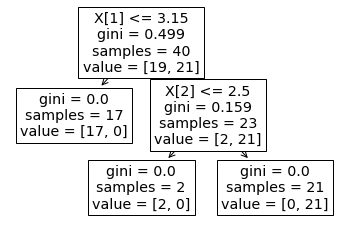

In [105]:
#https://pythonprogramminglanguage.com/decision-tree/

from sklearn import tree  #importamos de sklearn el modelo tree 
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

df2 = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/logisitca.csv') #usamos el mismo csv

X = df2[['gmat', 'gpa','work_experience']] #Estos seran los datos de entrenamiento
Y = df2['admited']

clf = tree.DecisionTreeClassifier()     #Usamos el metodo de descision tree clasifier, en ves de logistic regresion de sklearn                                                                   

clf = clf.fit(X, Y)               #entrenamos los datos con fit                                              
prediction = clf.predict(df2[['gmat', 'gpa','work_experience']])  #le pasamos los datos que queremos predecir  
print('La prediccion fue: ',prediction) #imprima la predccion del dato que hemos ingresado

tree.plot_tree(clf) #imprimimos graficamente el arbol de decision

#como podemos observar para estos 40 datos, este modelo fue muy preciso, la pagina nos recomienda para ejemplos en la vida
#real tenemos mas datos para que se entrene mejor y a precision sea mas real 

Aqui si comparamos los valores de la prediccion con los de la base de datos real, podemos ver que atino a todos, pienso que
es porque son muy pocos datos 

#### Mismo ejemplo con la base de datos Avocado.csv tomada de kengle

La prediccion fue:  ['conventional' 'conventional' 'organic' 'organic' 'conventional'
 'organic' 'conventional' 'organic' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'conventional'
 'conventional' 'organic' 'organic' 'organic' 'organic' 'conventional'
 'conventional' 'organic' 'organic' 'conventional' 'conventional'
 'conventional' 'conventional' 'conventional' 'organic' 'conventional'
 'organic' 'conventional' 'conventional' 'conventional' 'organic'
 'conventional' 'conventional' 'conventional' 'organic' 'conventional'
 'organic' 'organic' 'conventional' 'organic' 'conventional' 'organic'
 'organic' 'organic' 'conventional' 'organic' 'organic' 'conventional'
 'organic' 'organic' 'organic' 'organic' 'organic' 'conventional'
 'conventional' 'conventional' 'organic' 'organic' 'conventional'
 'conventional' 'organic' 'conventional' 'organic' 'conventional'
 'conventional' 'organic' 'organic' 'conventional' 'conventional'
 'organic' 'conventional' 'conventio

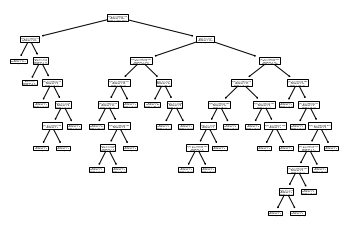

In [116]:
#importamos las librerias necesarias

from sklearn import tree  #importamos de sklearn el modelo tree 
import pandas as pdb
from sklearn.metrics import accuracy_score


df2 = pd.read_csv('https://raw.githubusercontent.com/ErickMatoss/otros/master/avocado.csv') #usamos el mismo csv
df3=df2.sample(400)

X = df3[['Total Volume','AveragePrice','Total Bags']] #Estos seran los datos de entrenamiento
Y = df3['type']

#Use este metodo que habia usado antes para entrenar mejor el algoritmo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% de los datos seran para entrenar
                                                                                         # el modelo y 30% para pruebas
    
clf2 = tree.DecisionTreeClassifier() #Usamos el metodo de descision tree clasifier, en ves de logistic regresion de sklearn                                                                   
   

clf2 = clf2.fit(X_train,y_train) #entrenamos los datos con train de la libreria sklearn

y_pred = clf2.predict(X_test) #hacemos las predicciones

print('La prediccion fue: ',y_pred) #imprimimos la prediccion

tree.plot_tree(clf2) #imprimimos graficamente el arbol de decision

print("Accuracy (Precisión):",metrics.accuracy_score(y_test, y_pred)) #imprimos la precision del modelo con las 2 variables (test y pred)


como podemos ver este metodo tiene una mejor precision